**Image Denoising**

1/1 [==============================] - 0s 240ms/step


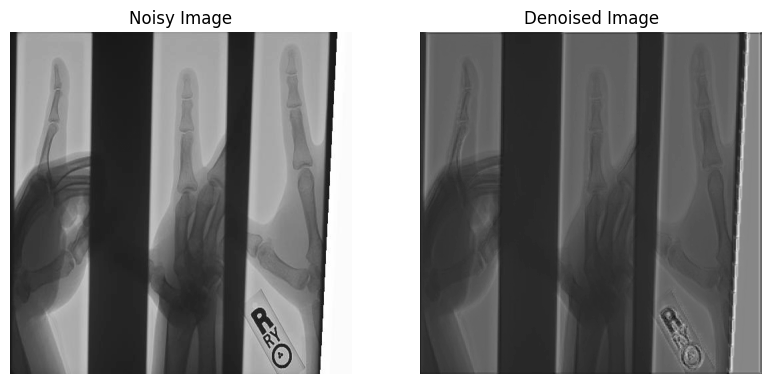

In [3]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Define the U-Net model for denoising
def unet_denoiser(input_shape=(512, 512, 1)):
    inputs = Input(shape=input_shape)
    
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    # Decoder
    conv2 = Conv2D(64, 3, activation='relu', padding='same')(pool1)
    up1 = UpSampling2D(size=(2, 2))(conv2)
    denoised = Conv2D(1, 3, activation='sigmoid', padding='same')(up1)
    
    model = Model(inputs=inputs, outputs=denoised)
    return model

# Define the directory containing the dataset
dataset_dir = "/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset"

# Get the list of image files in the directory
image_files = []
for root, _, files in os.walk(os.path.join(dataset_dir, 'train', 'images')):
    for file in files:
        if file.endswith(".jpg"):
            image_files.append(os.path.join(root, file))

# Choose a random image from the list
random_image_path = random.choice(image_files)

# Create the denoiser model
denoiser = unet_denoiser(input_shape=(512, 512, 1))

# Load and preprocess the noisy image
noisy_image = Image.open(random_image_path)
noisy_image = noisy_image.convert("L")  # Convert to grayscale
noisy_image = noisy_image.resize((512, 512))  # Resize to match model input size
noisy_image = np.array(noisy_image)  # Convert to numpy array
noisy_image = np.expand_dims(noisy_image, axis=-1)  # Add channel dimension

# Normalize the image to range [0, 1]
noisy_image = noisy_image / 255.0

# Denoise the image
denoised_image = denoiser.predict(np.array([noisy_image]))

# Display the original, noisy, and denoised images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(noisy_image.squeeze(), cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(denoised_image.squeeze(), cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

plt.show()